In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Model, Sequential

In [2]:
physical_devices = tf.config.list_physical_devices('GPU')
print(f'GPU: {physical_devices}')
try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
    pass

GPU: []


In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print(f'len(x_train)= {len(x_train)}')
print(f'len(x_test)= {len(x_test)}')
print(f'x_train.shape= {x_train.shape}')

len(x_train)= 60000
len(x_test)= 10000
x_train.shape= (60000, 28, 28)


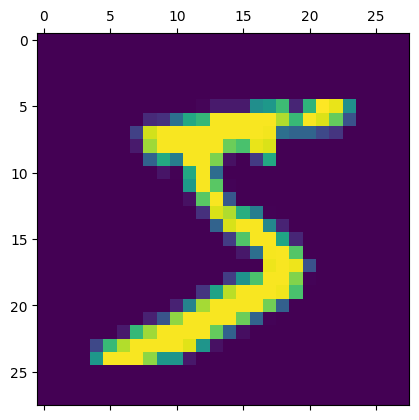

In [4]:
plt.matshow(x_train[0])

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

x_train[0]

In [6]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

x_train.shape

(60000, 28, 28, 1)

In [7]:
model = Sequential([
    Conv2D(filters=16, kernel_size = (3,3), activation = 'relu', padding='same'),
    MaxPooling2D(),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(10, activation='softmax')
])

model.build(input_shape=(None, 28, 28, 1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 16)                50192     
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 10)                170       
                                                        

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=100, epochs=5)

Epoch 1/5
600/600 [==============================] - 19s 29ms/step - loss: 0.4441 - accuracy: 0.8646
Epoch 2/5
600/600 [==============================] - 17s 28ms/step - loss: 0.1389 - accuracy: 0.9593
Epoch 3/5
600/600 [==============================] - 19s 31ms/step - loss: 0.0974 - accuracy: 0.9716
Epoch 4/5
600/600 [==============================] - 23s 38ms/step - loss: 0.0766 - accuracy: 0.9774
Epoch 5/5
600/600 [==============================] - 23s 38ms/step - loss: 0.0652 - accuracy: 0.9803


In [9]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss :.7f}")
print(f"Test Accuracy: {test_accuracy*100 :.3f}%")

313/313 [==============================] - 7s 15ms/step - loss: 0.0639 - accuracy: 0.9793
Test Loss: 0.0639074
Test Accuracy: 97.930%


In [10]:
y_pred = model.predict(x_test)
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred[0]

313/313 [==============================] - 6s 15ms/step


array([5.6405796e-08, 2.6336810e-08, 6.7494611e-06, 4.1492800e-05,
       1.0817943e-09, 1.2970080e-06, 8.7860960e-12, 9.9987882e-01,
       3.7724626e-06, 6.7788744e-05], dtype=float32)

Actual: 0


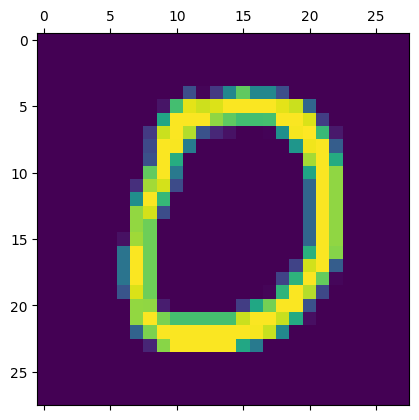

In [12]:
print(f'Actual: {np.argmax(y_pred[10])}')
plt.matshow(x_test[10])

Text(50.722222222222214, 0.5, 'Truth')

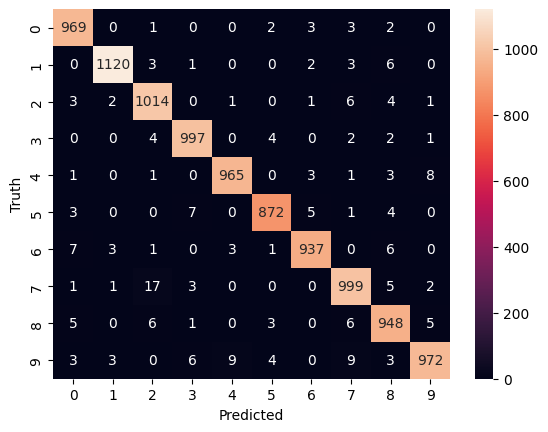

In [13]:
import seaborn as sn

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)

sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')